In [126]:
# analyzing the youtube data 
# download the dataset from kaggle https://www.kaggle.com/datasnaek/youtube-new
# performing data cleaning and EDA in the dataset
# importing the libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [128]:
# reading the json file with pandas.read_json() method

In [129]:
df=pd.read_json('archive (12)/CA_category_id.json')
df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [130]:
# kind column has only one unique value 
# it is not needed to extract

In [131]:
df['kind'].unique()

array(['youtube#videoCategoryListResponse'], dtype=object)

In [132]:
# kind column has only one unique value 
# it is not needed to extract

In [133]:
df['etag'].unique()

array(['"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"'],
      dtype=object)

In [134]:
# column kind has the json data
# kind,etag,id,snippet,channerlid,title and assignable are the keys present in the kind column

In [135]:
row=df.iloc[:1,2]
for i in row:
    print(i)

{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}


In [136]:
# we also know that kind and etag have only one unique value
# so we are taking only id,channel id ,title,assignable
# we are saving all data of json in kind column in dictionary

In [137]:
d={'id':[],'channelId':[],'title':[],'assignable':[]}
for item in df['items']:
    d['id'].append(item['id'])
    d['channelId'].append(item['snippet']['channelId'])
    d['title'].append(item['snippet']['title'])
    d['assignable'].append(item['snippet']['assignable'])


In [138]:
# we are making a dataset with dictionay by pandas.DataFrame() method

In [139]:
df2=pd.DataFrame(d)
df2.head()

,id,channelId,title,assignable
0,1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [140]:
# concatenating the columns of df1 and df2 
# deleting the column items which has the json data

In [141]:
df3=pd.concat([df,df2],axis=1)
CA_category=df3.drop(columns=['items'],axis=1)
CA_category.head()

,kind,etag,id,channelId,title,assignable
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [142]:
# inspecting the dataset with info() method

In [143]:
CA_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   kind        31 non-null     object
 1   etag        31 non-null     object
 2   id          31 non-null     object
 3   channelId   31 non-null     object
 4   title       31 non-null     object
 5   assignable  31 non-null     bool  
dtypes: bool(1), object(5)
memory usage: 1.4+ KB


In [144]:
# column id has datatype "object" converting it into the "int32"

In [145]:
CA_category['id']=CA_category['id'].astype('int32')


In [146]:
# json file contains the video category data 
# only 30 video categories are there 

In [147]:
CA_category.shape

(31, 6)

In [148]:
# dataset contains 10 json files and 10 csv files
# each json and csv for one country
# countries are USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, India and Japan.

In [149]:
import os 

base_dir=os.getcwd()
base_dir+='\\archive (12)'
for file in os.listdir(base_dir):
    print(file)

.ipynb_checkpoints
CAvideos.csv
CA_category_id.json
DEvideos.csv
DE_category_id.json
FRvideos.csv
FR_category_id.json
GBvideos.csv
GB_category_id.json
INvideos.csv
IN_category_id.json
JPvideos.csv
JP_category_id.json
KRvideos.csv
KR_category_id.json
MXvideos.csv
MX_category_id.json
RUvideos.csv
RU_category_id.json
USvideos.csv
US_category_id.json


In [150]:
# performing the above operations in all the json files
# saving all the dataFrames in a list

In [151]:
all_json_csv=[]
all_json_files=['archive (12)/CA_category_id.json',
                'archive (12)/DE_category_id.json',
                'archive (12)/FR_category_id.json',
                'archive (12)/CA_category_id.json',
                'archive (12)/GB_category_id.json',
                'archive (12)/IN_category_id.json',
                'archive (12)/JP_category_id.json',
                'archive (12)/KR_category_id.json',
                'archive (12)/MX_category_id.json',
                'archive (12)/RU_category_id.json',
                'archive (12)/US_category_id.json']
for file in all_json_files:
    #print(file.split('.'))
        
    
    df=pd.read_json(file)
    d={'id':[],'channelId':[],'title':[],'assignable':[]}
    for item in df['items']:
        d['id'].append(item['id'])
        d['channelId'].append(item['snippet']['channelId'])
        d['title'].append(item['snippet']['title'])
        d['assignable'].append(item['snippet']['assignable'])
        
    df2=pd.DataFrame(d)
    df3=pd.concat([df,df2],axis=1)
    category=df3.drop(columns=['items'],axis=1)
    
    category['id']=category['id'].astype('int32')
    all_json_csv.append(category)
       

    

In [152]:
# its time to perform data cleaning on csv files
# json files contains the data of video category 
# csv files contains the videos data


In [153]:
CAvideos=pd.read_csv('archive (12)/CAvideos.csv')
CAvideos=CAvideos.rename(columns={'category_id':'id'})
CAvideos.head()

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [154]:
# inspecting the data

In [155]:
CAvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   id                      40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [156]:
# trending date column has the object type data

In [157]:
CAvideos['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40876    18.14.06
40877    18.14.06
40878    18.14.06
40879    18.14.06
40880    18.14.06
Name: trending_date, Length: 40881, dtype: object

In [158]:
# converting the trending date column to "date" type
# the year is in the form of YY format,converting it into YYYY format by addign 2000 to it

In [159]:
date=CAvideos['trending_date'].str.split('.')
d={'trending_date':[]}
for i in date:
    d['trending_date'].append(i[1]+'-'+i[2]+'-'+str(int(i[0])+2000))
date=pd.DataFrame(d)
CAvideos=CAvideos.drop(columns='trending_date',axis=1)


In [160]:
# concatenating the trending date to the dataset

In [161]:

CAvideos=pd.concat([CAvideos,date],axis=1)



In [162]:
# converting the trending date column to the "date type" using pd.to_datetime()

In [163]:
CAvideos['trending_date']=pd.to_datetime(CAvideos['trending_date'],format='%d-%m-%Y')


In [164]:
CAvideos['trending_date']

0       2017-11-14
1       2017-11-14
2       2017-11-14
3       2017-11-14
4       2017-11-14
           ...    
40876   2018-06-14
40877   2018-06-14
40878   2018-06-14
40879   2018-06-14
40880   2018-06-14
Name: trending_date, Length: 40881, dtype: datetime64[ns]

In [165]:
# inspecting the column publish time 
# it contains the publish time and date ,seperating it into date and time

In [166]:
CAvideos['publish_time']=pd.to_datetime(CAvideos['publish_time'])

CAvideos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40881 non-null  object             
 1   title                   40881 non-null  object             
 2   channel_title           40881 non-null  object             
 3   id                      40881 non-null  int64              
 4   publish_time            40881 non-null  datetime64[ns, UTC]
 5   tags                    40881 non-null  object             
 6   views                   40881 non-null  int64              
 7   likes                   40881 non-null  int64              
 8   dislikes                40881 non-null  int64              
 9   comment_count           40881 non-null  int64              
 10  thumbnail_link          40881 non-null  object             
 11  comments_disabled       40881 non-null  b

In [167]:
# appending the published date ,extracted from publish time column

In [168]:
CAvideos['published_date']=pd.to_datetime(CAvideos['publish_time'],format='%d-%m-%Y')



In [169]:
# publish time has the date and time together converting it into time 

In [170]:
CAvideos['published_time']=CAvideos['publish_time'].dt.time
#CAvideos['published_time']=CAvideos['published_time'].dt.strftime('%H:%M:%S')


In [171]:
# checking for duplicted row in dataset 

In [172]:
CAvideos.duplicated(subset=['video_id']).sum()

16454

In [173]:
# removing the duplicated rows 

In [174]:
CAvideos=CAvideos.drop_duplicates('video_id',keep='first')
CAvideos.shape

(24427, 18)

In [175]:
# renaming the column "category id" to "id"

In [176]:
CAvideos=CAvideos.rename(columns={'category_id':'id'})

In [177]:
# performing the all above operations in the all csv files
# printing the sample dataset

In [178]:
all_csv=[]
all_csv_files=['archive (12)/CAvideos.csv',
               'archive (12)/DEvideos.csv',
               'archive (12)/FRvideos.csv',
               'archive (12)/GBvideos.csv',
               'archive (12)/JPvideos.csv',
               'archive (12)/INvideos.csv',
               'archive (12)/KRvideos.csv',
               'archive (12)/MXvideos.csv',
               'archive (12)/RUvideos.csv',
               'archive (12)/USvideos.csv',]
for csv in all_csv_files:
    try:
        videos=pd.read_csv(csv,encoding='utf-8')
        #print('a')
    except:
        videos=pd.read_csv(csv,encoding="ISO-8859-1")
        #print('b')
    print(videos.shape,end=' ')
    videos['country']=csv.split('/')[1][:2]
    date=videos['trending_date'].str.split('.')
    d={'trending_date':[]}
    for i in date:
        d['trending_date'].append(i[1]+'-'+i[2]+'-'+str(int(i[0])+2000))
    date=pd.DataFrame(d)
    videos=videos.drop(columns='trending_date',axis=1)
    
    videos=pd.concat([videos,date],axis=1)
    videos['trending_date']=pd.to_datetime(date['trending_date'],format='%d-%m-%Y')
    
    videos=videos.drop_duplicates('video_id',keep='first')
    videos=videos.rename(columns={'category_id':'id'})
    videos['publish_time']=pd.to_datetime(videos['publish_time'])
    videos['published_date']=videos['publish_time'].dt.date
    videos['published_time']=videos['publish_time'].dt.time
    videos=videos.drop(columns='publish_time',axis=1)
    all_csv.append(videos)
videos.head()

(40881, 16) (40840, 16) (40724, 16) (38916, 16) (20523, 16) (37352, 16) (34567, 16) (40451, 16) (40739, 16) (40949, 16) 

,video_id,title,channel_title,id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date,published_date,published_time
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017-11-14,2017-11-13,17:13:01
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017-11-14,2017-11-13,07:30:00
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,2017-11-14,2017-11-12,19:05:24
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017-11-14,2017-11-13,11:00:04
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017-11-14,2017-11-12,18:01:41


In [179]:
# cheking the country column

In [180]:
videos['country'].unique()

array(['US'], dtype=object)

In [181]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 0 to 40766
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                6351 non-null   object        
 1   title                   6351 non-null   object        
 2   channel_title           6351 non-null   object        
 3   id                      6351 non-null   int64         
 4   tags                    6351 non-null   object        
 5   views                   6351 non-null   int64         
 6   likes                   6351 non-null   int64         
 7   dislikes                6351 non-null   int64         
 8   comment_count           6351 non-null   int64         
 9   thumbnail_link          6351 non-null   object        
 10  comments_disabled       6351 non-null   bool          
 11  ratings_disabled        6351 non-null   bool          
 12  video_error_or_removed  6351 non-null   bool        

In [182]:
# merging the json files dataset and csv files datasets by country wise
# merging the datasets based on the "column" and performing "inner" join

In [183]:
merged=[]

for json,csv in zip(all_json_csv,all_csv):
    df=pd.merge(json,csv,on='id',how='inner')
    print(csv.isna().sum().sum(),end=' ')
    print(df.isna().sum().sum())
    merged.append(df)


973 971
1305 1296
2479 2475
58 55
1342 1342
294 294
1602 1601
3627 3534
2166 2069
102 101


In [184]:
# checking the no of rows in each dataset

In [185]:
for df in merged:
    print(df.shape)

(24377, 23)
(29425, 23)
(30477, 23)
(3266, 23)
(12899, 23)
(16238, 23)
(15757, 23)
(33302, 23)
(32968, 23)
(6337, 23)


In [186]:
# concatenating all countries dataset column wise
# printing the shape of the dataset

In [187]:
merged_df=pd.concat([df for df in merged],axis=0)
merged_df.shape

(205046, 23)

In [188]:
# columns of the dataset

In [189]:
merged_df.columns

Index(['kind', 'etag', 'id', 'channelId', 'title_x', 'assignable', 'video_id',
       'title_y', 'channel_title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'country',
       'trending_date', 'published_date', 'published_time'],
      dtype='object')

In [190]:
# inspecting the dataset 
# the column "description" has 13738 null values 

In [191]:
205046-191308

13738

In [192]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205046 entries, 0 to 6336
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   kind                    205046 non-null  object        
 1   etag                    205046 non-null  object        
 2   id                      205046 non-null  int32         
 3   channelId               205046 non-null  object        
 4   title_x                 205046 non-null  object        
 5   assignable              205046 non-null  bool          
 6   video_id                205046 non-null  object        
 7   title_y                 205046 non-null  object        
 8   channel_title           205046 non-null  object        
 9   tags                    205046 non-null  object        
 10  views                   205046 non-null  int64         
 11  likes                   205046 non-null  int64         
 12  dislikes                205046 non-nu

In [193]:
# checking the kind column 

In [194]:
merged_df['kind'].unique()

array(['youtube#videoCategoryListResponse'], dtype=object)

In [195]:
# column kind has only one unique value 
# so removing it from the dataset

In [196]:
merged_df=merged_df.drop(columns='kind',axis=1)
merged_df.head()

,etag,id,channelId,title_x,assignable,video_id,title_y,channel_title,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date,published_date,published_time
0,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,FyZMnhUtLfE,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",158815,218,30,186,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...,CA,2017-11-14,2017-11-12,16:00:01
1,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,fy-CuCzaPp8,Rooster Teeth Animated Adventures - Drunk Baby...,Rooster Teeth,"Rooster Teeth|""RT""|""animation""|""television""|""f...",308568,19541,70,495,https://i.ytimg.com/vi/fy-CuCzaPp8/default.jpg,False,False,False,Miles gets stuck at work one night watching ov...,CA,2017-11-14,2017-11-13,14:00:03
2,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,kzwfHumJyYc,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,CA,2017-11-14,2017-11-12,12:20:39
3,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,-Toujzk3ysk,"Gerrymandering, Conservative Comedians, Bobby ...",Real Time with Bill Maher,"DNC Chairwoman Donna Brazile|""Hacks""|""The Insi...",458964,4903,392,1289,https://i.ytimg.com/vi/-Toujzk3ysk/default.jpg,False,False,False,Subscribe to the Real Time YouTube: http://its...,CA,2017-11-14,2017-11-11,05:30:08
4,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True,kOnQocd799Y,Everything Wrong With Baby Driver In 14 Minute...,CinemaSins,"baby driver|""edgar wright""|""everything wrong w...",2736733,58967,3492,7915,https://i.ytimg.com/vi/kOnQocd799Y/default.jpg,False,False,False,"Here's a movie that most people, including us,...",CA,2017-11-14,2017-11-09,17:14:11


In [197]:
# checking the etag column

In [198]:
merged_df['etag'].unique()

array(['"ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2qTj13hkQZk"',
       '"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"',
       '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"'],
      dtype=object)

In [199]:
# column etag has only one unique value 
# so removing it from the dataset

In [200]:
merged_df=merged_df.drop(columns='etag',axis=1)


In [201]:
merged_df.shape

(205046, 21)

In [202]:
# checking for duplicate rows 

In [203]:
merged_df.duplicated(subset=['video_id']).sum()

22747

In [204]:
# removing all duplicated  rows

In [205]:
merged_df=merged_df.drop_duplicates('video_id',keep='first')
merged_df.shape

(182299, 21)

In [206]:
#checking for null values
# column description has 12967 null values

In [207]:
merged_df.isna().sum()

id                            0
channelId                     0
title_x                       0
assignable                    0
video_id                      0
title_y                       0
channel_title                 0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               12967
country                       0
trending_date                 0
published_date                0
published_time                0
dtype: int64

In [208]:
# removing the column description

In [209]:
merged_df=merged_df.drop(columns='description',axis=1)


In [210]:
# renaming the column title_x to category

In [211]:
merged_df=merged_df.rename(columns={'title_x':'category'})
merged_df.columns

Index(['id', 'channelId', 'category', 'assignable', 'video_id', 'title_y',
       'channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'country', 'trending_date', 'published_date',
       'published_time'],
      dtype='object')

In [212]:
 # Ratio of likes-dislikes in different categories
# to calculate that divide sum of likes with sum of dislikes by category wise

In [213]:
likes=merged_df.groupby('category')['likes'].sum()
dislikes=merged_df.groupby('category')['dislikes'].agg('sum')
likes_dislikes_ratio=likes/dislikes
likes_dislikes_ratio=likes_dislikes_ratio.sort_values(ascending=False)
likes_dislikes_ratio=pd.DataFrame(likes_dislikes_ratio,columns=['ratio'])
likes_dislikes_ratio

,ratio
category,
Trailers,inf
Pets & Animals,38.716438
Howto & Style,30.117611
Education,28.369119
Gaming,26.891060
Music,26.785348
Science & Technology,22.320670
Film & Animation,21.850140
Sports,21.739690


<Axes: xlabel='ratio', ylabel='category'>

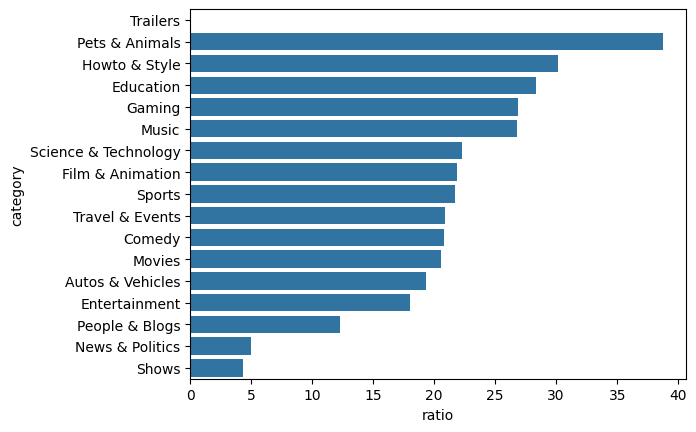

In [214]:

sns.barplot(x='ratio',y='category',data=likes_dislikes_ratio)


In [215]:
'''observation :
pets and Animals, howto and style, education,gaming, music 
are the top 5 categories which have highest like-dislikes ratio'''

'observation :\npets and Animals, howto and style, education,gaming, music \nare the top 5 categories which have highest like-dislikes ratio'

In [216]:
#Users like videos from which category more?
# to see that group all rows by categorywise and sum all the likes

In [217]:
likes=merged_df.groupby('category')['likes'].agg('sum').sort_values(ascending=False)
likes=pd.DataFrame(likes)
likes


,likes
category,
Entertainment,356340961
Music,248765865
Comedy,165274771
People & Blogs,124930558
Howto & Style,61492873
Sports,58786164
Gaming,53135955
Film & Animation,44686683
News & Politics,44092067


<Axes: xlabel='likes', ylabel='category'>

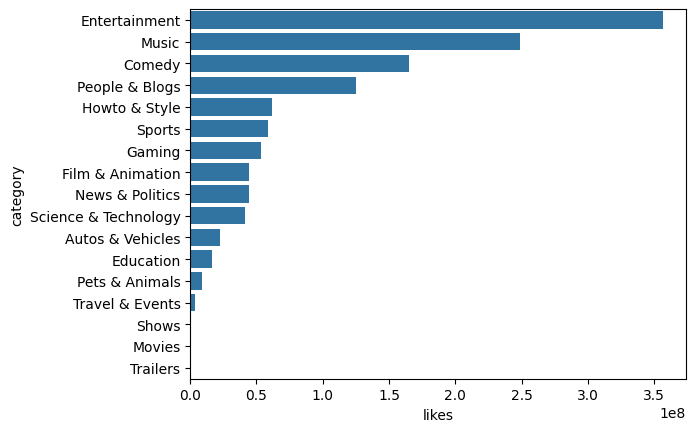

In [218]:

sns.barplot(x='likes',y='category',data=likes)


In [219]:
'''
observation:
Entertainment ,music,comedy , blogs,sports are the top 5 categories which has more no of likes
'''

'\nobservation:\nEntertainment ,music,comedy , blogs,sports are the top 5 categories which has more no of likes\n'

In [220]:

# replacing the country column according to the country map dictionary

In [221]:

country_map={'CA':'canada','FR':'france','GB':'britan','JP':'japan','IN':'india','KR':'korea','MX':'mexico','RU':'Russia','US':'america','DE':'germany'}
merged_df['country']=merged_df['country'].replace(country_map)
countries=merged_df['country'].unique()
countries

array(['canada', 'germany', 'france', 'britan', 'japan', 'india', 'korea',
       'mexico', 'Russia', 'america'], dtype=object)

In [222]:
#Users like videos from which category more country wise


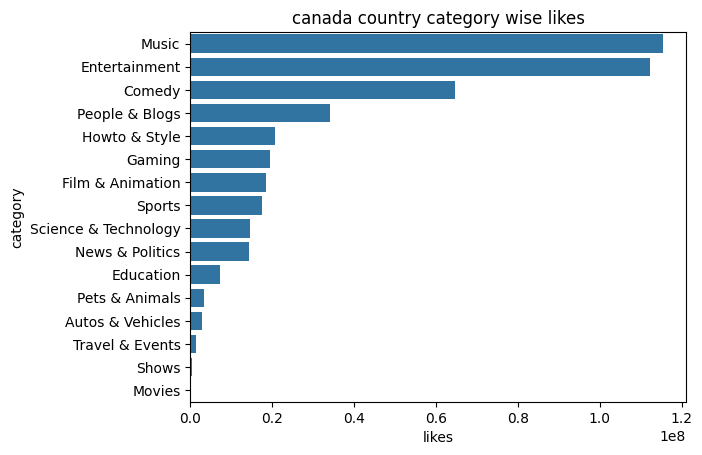

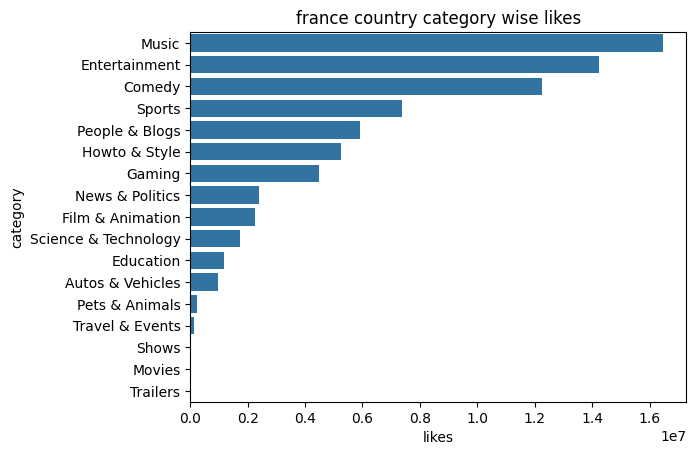

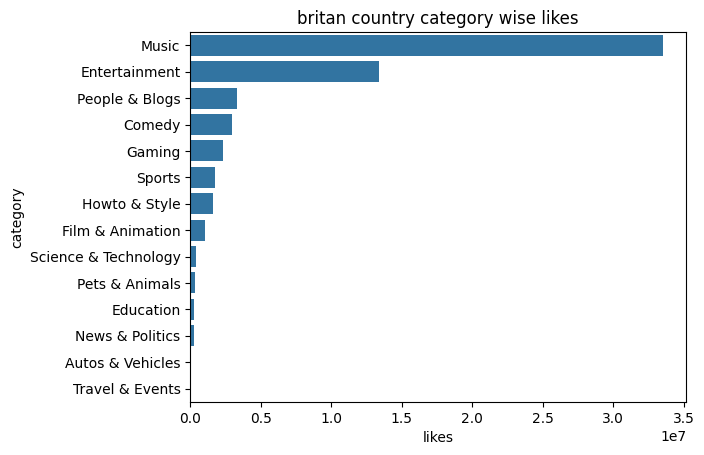

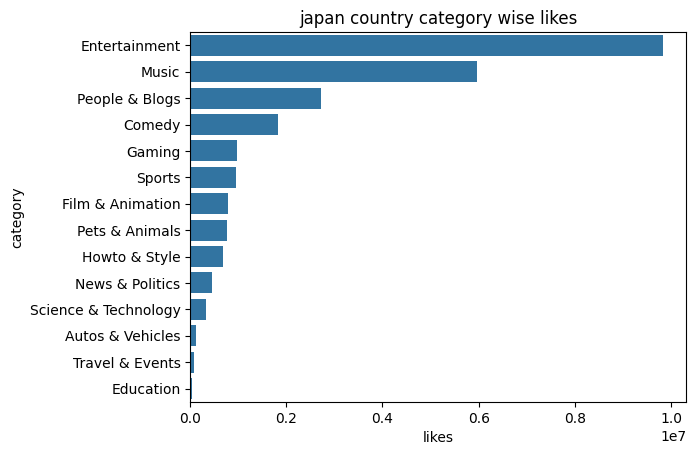

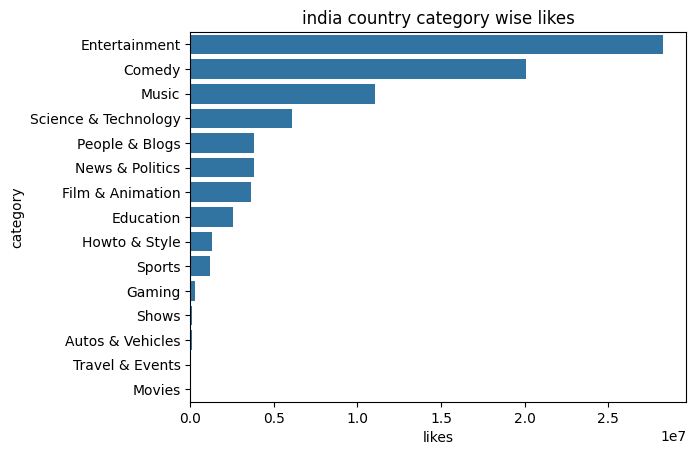

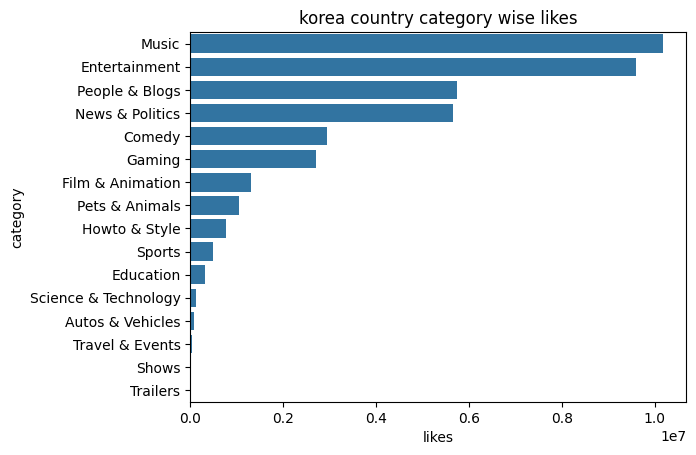

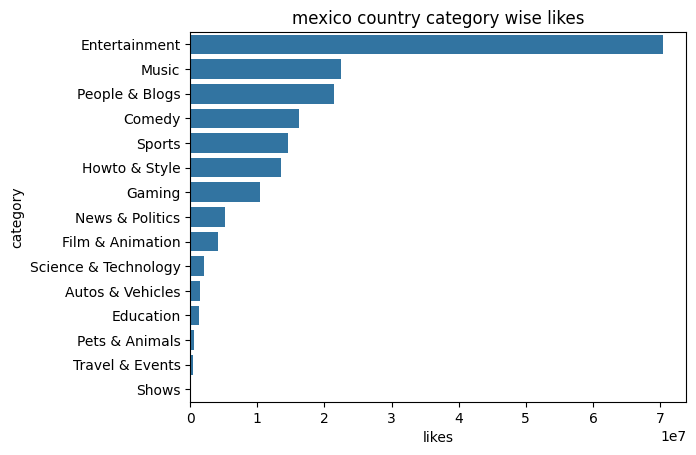

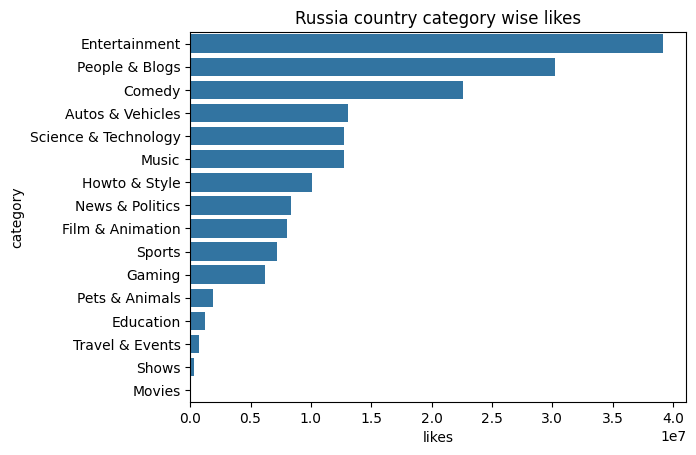

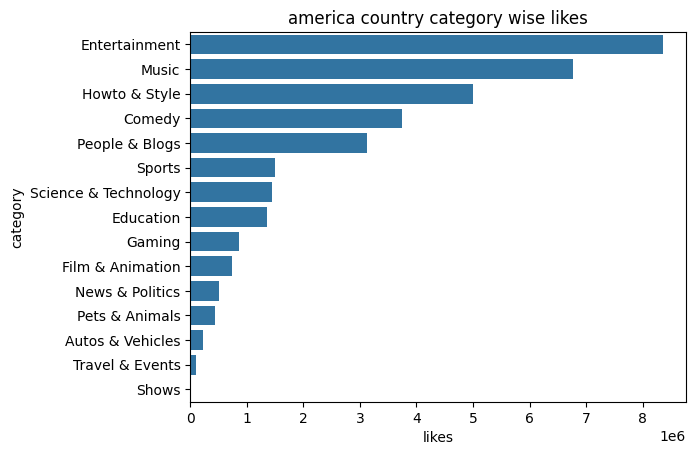

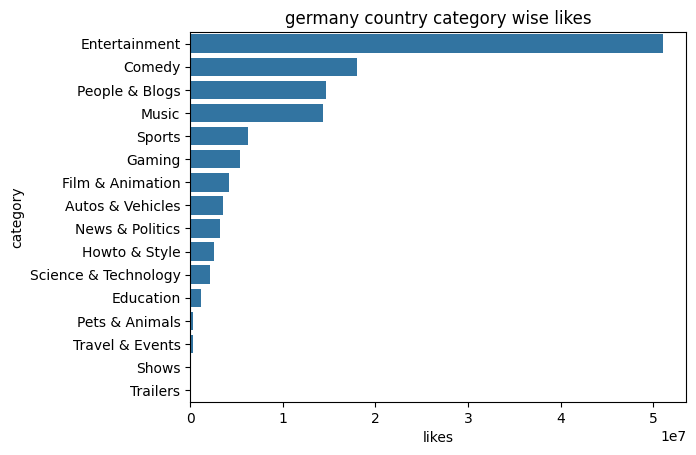

In [223]:
plots=[]
for country in country_map:
    likes_by_country=merged_df[merged_df['country']==country_map[country]].groupby('category')['likes'].sum().sort_values(ascending=False)
    df=pd.DataFrame(likes_by_country)
    sns.barplot(y='category',x='likes',data=df)
    plt.title('{} country category wise likes'.format(country_map[country]))
    plt.show()
    

In [224]:
#Top 5 videos that are on trending in each country?
merged_df.columns

Index(['id', 'channelId', 'category', 'assignable', 'video_id', 'title_y',
       'channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'country', 'trending_date', 'published_date',
       'published_time'],
      dtype='object')

In [225]:
# Top 5 videos that are on trending in each country

In [226]:
for country in country_map:
    trending=merged_df[merged_df['country']==country_map[country]].sort_values(by=['views'],ascending=False)
    df=pd.DataFrame(trending[['video_id','views','category','likes','views']])
   
    print('Top 5 videos that are on trending in',country_map[country])
    print(df.head(5))
    print()

Top 5 videos that are on trending in canada
          video_id     views       category    likes     views
2766   7C2z4GqqS5E  39349927          Music  3880074  39349927
11180  6ZfuNTqbHE8  37736281  Entertainment  1735931  37736281
1995   wfWkmURBNv8  37597115          Music   769384  37597115
1400   2Vv-BfVoq4g  33523622          Music  1634130  33523622
1493   xmU0s2QtaEY  24939458          Music   529906  24939458

Top 5 videos that are on trending in france
          video_id     views       category   likes     views
4522   AhQcNVyndSM  31791115          Music  299378  31791115
21527  Ed-A73MxMgo  12118553  Entertainment   50708  12118553
2774   ZgTKmRPWMq4   6451953          Music  136776   6451953
3609   Iwz4P8HfGVM   6389033          Music  112962   6389033
4600   tKO87MJtngk   5859790          Music   95516   5859790

Top 5 videos that are on trending in britan
        video_id     views category    likes     views
887  WtE011iVx1Q  47669287    Music   396337  47669287
711  V

In [227]:
#Is the most liked video also the most trending video?

In [228]:
for country in country_map:
    trending=merged_df[merged_df['country']==country_map[country]].sort_values(by=['likes'],ascending=False)
    df=pd.DataFrame(trending[['video_id','views','category','likes','views']])
   
    print('Top 5 videos that are on trending in',country_map[country])
    print(df.head(5))
    print()

Top 5 videos that are on trending in canada
          video_id     views       category    likes     views
2766   7C2z4GqqS5E  39349927          Music  3880074  39349927
1489   kTlv5_Bs8aw  13945717          Music  2055166  13945717
2195   OK3GJ0WIQ8s  10695328          Music  2050563  10695328
2667   p8npDG2ulKQ  10666323          Music  1956230  10666323
11180  6ZfuNTqbHE8  37736281  Entertainment  1735931  37736281

Top 5 videos that are on trending in france
          video_id     views       category    likes     views
3499   8O_MwlZ2dEg   5275672          Music  1401947   5275672
4219   28XC2KRE-DE   2248202          Music   401604   2248202
3479   cD8SYW8rjaQ   2191988          Music   354931   2191988
4522   AhQcNVyndSM  31791115          Music   299378  31791115
17786  YDLNnw7gWLo   2351873  Entertainment   259078   2351873

Top 5 videos that are on trending in britan
         video_id     views       category    likes     views
2479  _5d-sQ7Fh5M  11511155  Entertainment  1133

In [229]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182299 entries, 0 to 6334
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      182299 non-null  int32         
 1   channelId               182299 non-null  object        
 2   category                182299 non-null  object        
 3   assignable              182299 non-null  bool          
 4   video_id                182299 non-null  object        
 5   title_y                 182299 non-null  object        
 6   channel_title           182299 non-null  object        
 7   tags                    182299 non-null  object        
 8   views                   182299 non-null  int64         
 9   likes                   182299 non-null  int64         
 10  dislikes                182299 non-null  int64         
 11  comment_count           182299 non-null  int64         
 12  thumbnail_link          182299 non-nu

In [230]:
# Maximum number of days to trending status for a video

In [231]:
merged_df['published_date']= pd.to_datetime(merged_df['published_date'],format='%d-%m-%Y')
merged_df['timespan'] = (merged_df['trending_date'] - merged_df['published_date']).dt.days
trending=pd.DataFrame(merged_df['timespan'].value_counts())
trending

,count
timespan,
1,140939
2,17553
0,16569
3,2461
4,1214
...,...
2184,1
1235,1
472,1


<Axes: xlabel='count', ylabel='timespan'>

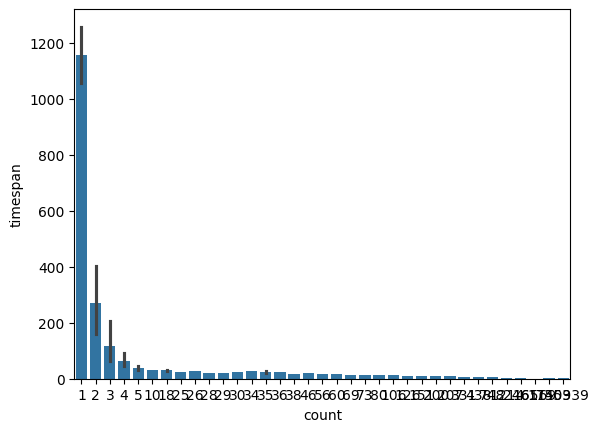

In [232]:
sns.barplot(x='count',y='timespan',data=trending)

In [233]:
#Users comment on which category the most?

In [234]:
comment_count=merged_df.groupby('category')['comment_count'].sum().sort_values(ascending=False)
comment_count=pd.DataFrame(comment_count)
comment_count

,comment_count
category,
Entertainment,54061612
Music,23381489
People & Blogs,20394603
Comedy,19205867
News & Politics,12176381
Howto & Style,9387440
Science & Technology,9216968
Gaming,8695125
Sports,7740339


<Axes: xlabel='comment_count', ylabel='category'>

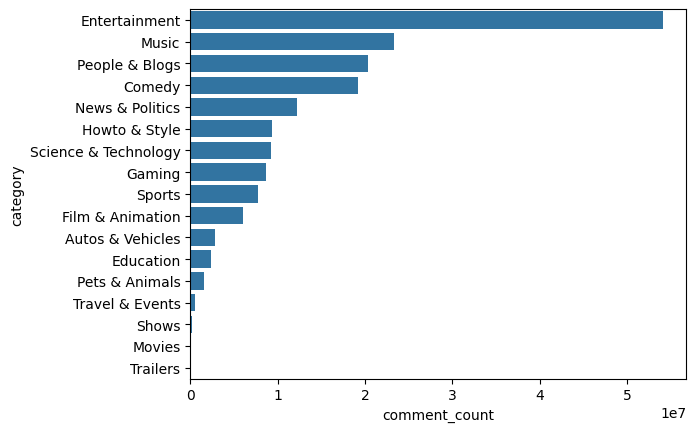

In [235]:
sns.barplot(x='comment_count',y='category',data=comment_count)

In [236]:
#Correlation between views, likes, dislikes, and comments

<Axes: >

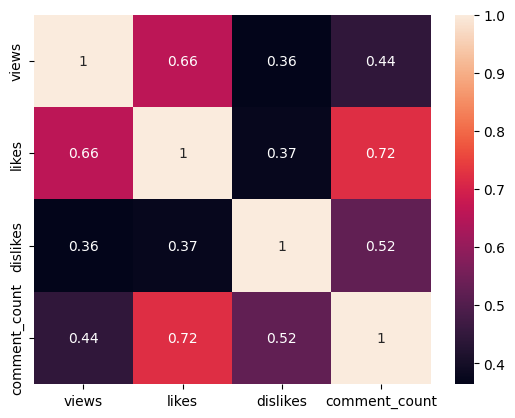

In [237]:
columns=['views','likes','dislikes','comment_count']
sns.heatmap(merged_df[columns].corr(),annot=True)

In [238]:
#which you tube channel has the most likes 

In [239]:
merged_df['channel_title'].unique()

array(['大劇獨播', 'Rooster Teeth', 'Lokdhun Punjabi', ..., 'To Scale:',
       'Deep Look', 'Mrwhosetheboss'], dtype=object)

In [240]:
channel_likes=merged_df.groupby('channel_title')['likes'].sum().sort_values(ascending=False)
channel_likes=pd.DataFrame(channel_likes)
channel_likes.head()

,likes
channel_title,
ibighit,16872642
PewDiePie,12481932
SMTOWN,11522512
BANGTANTV,8950098
Cracks,7645419


In [241]:
#which you tube channel has the most likes country wise

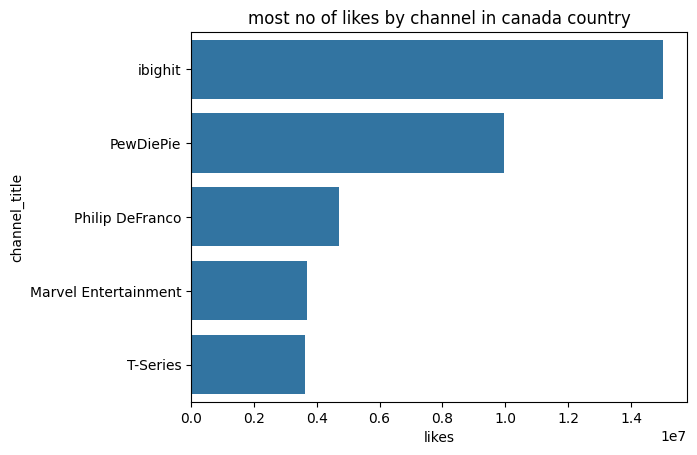

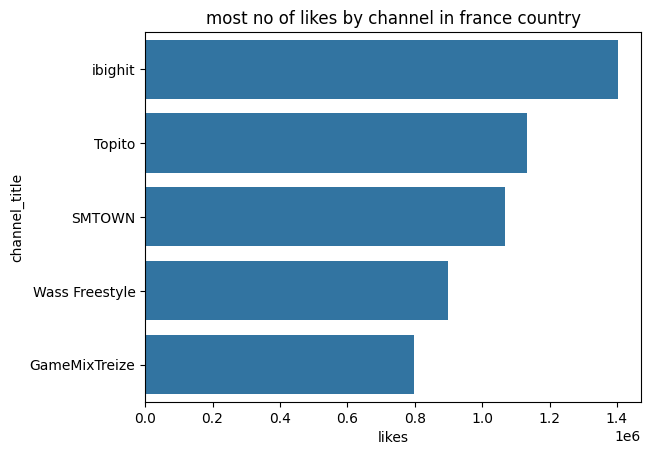

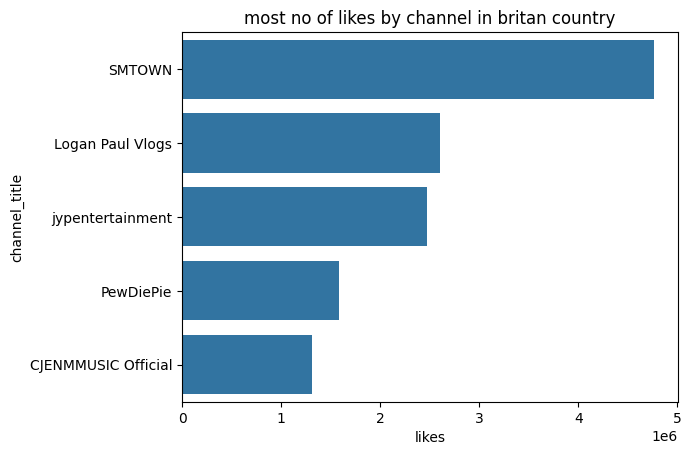

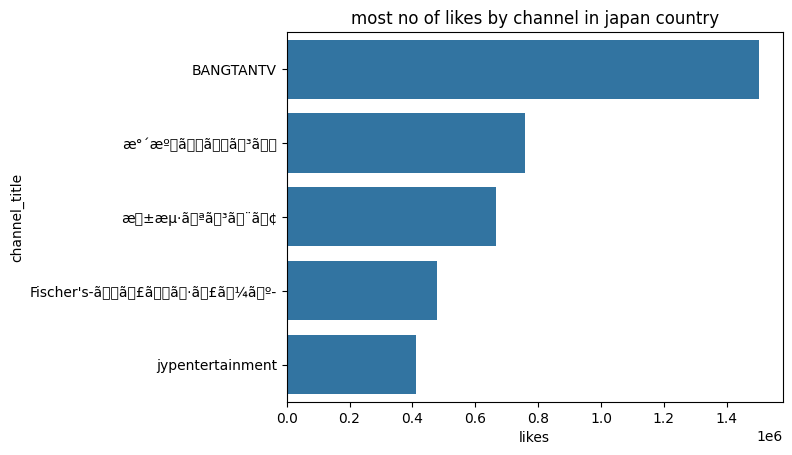

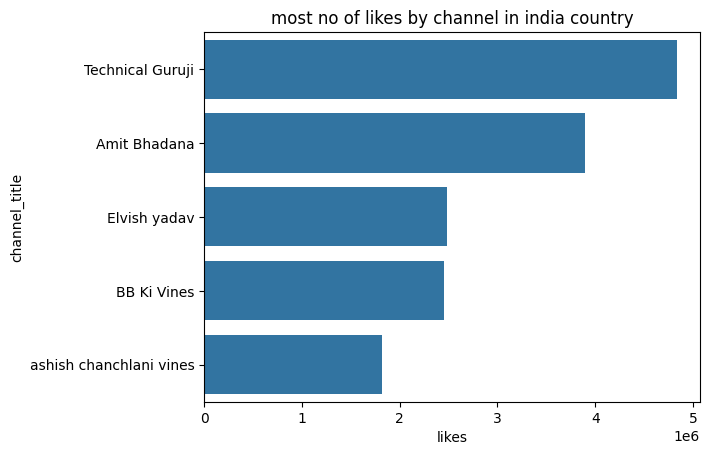

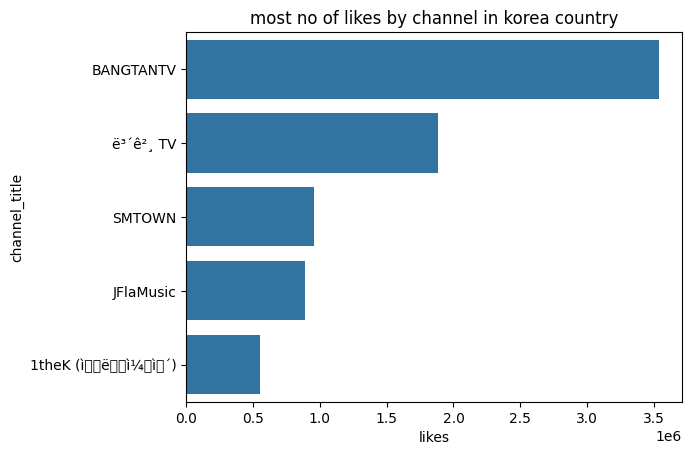

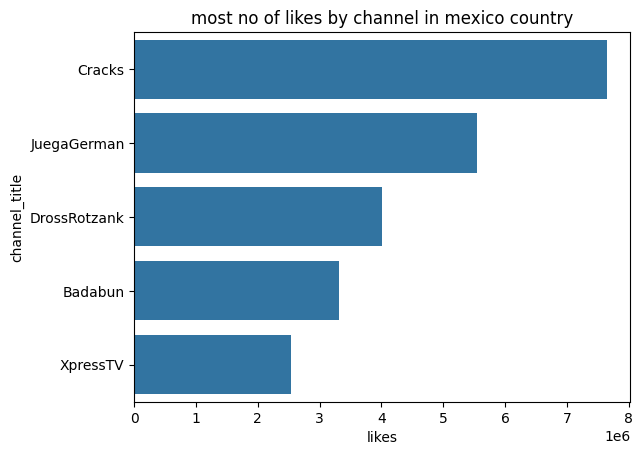

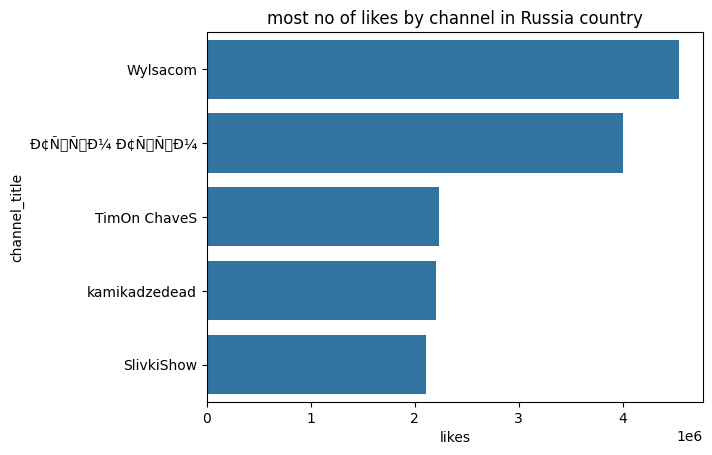

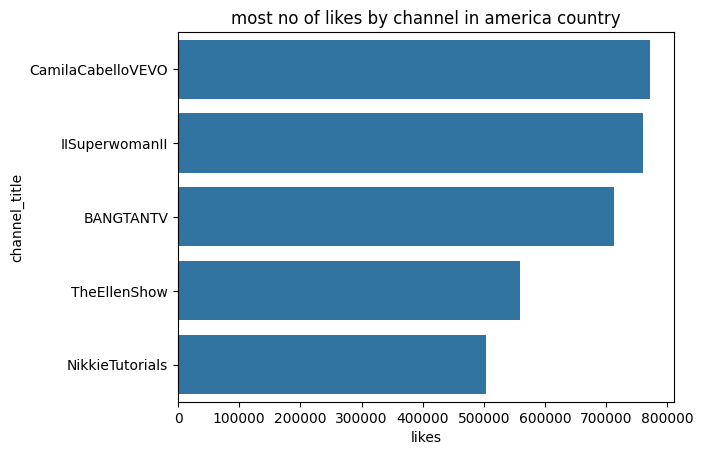

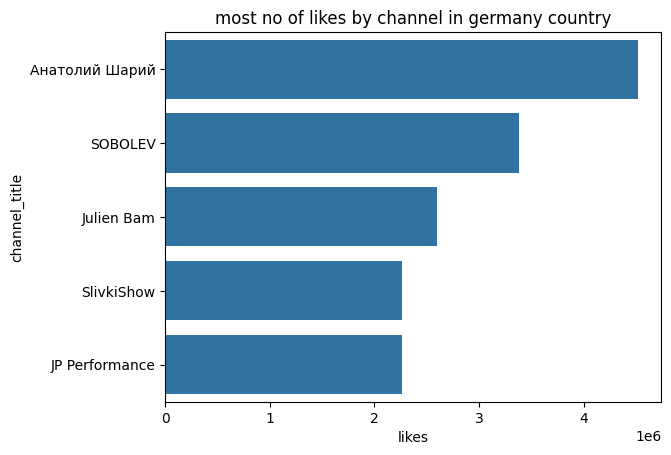

In [242]:
for country in country_map:
    channel_likes=merged_df[merged_df['country']==country_map[country]].groupby('channel_title')['likes'].sum().sort_values(ascending=False)
    channel_likes=pd.DataFrame(channel_likes)
    channel_likes=channel_likes.head(5)
    sns.barplot(x='likes',y='channel_title',data=channel_likes)
    plt.title('most no of likes by channel in {} country'.format(country_map[country]))
    plt.show()

In [243]:
#country wise channel most liked videos on category

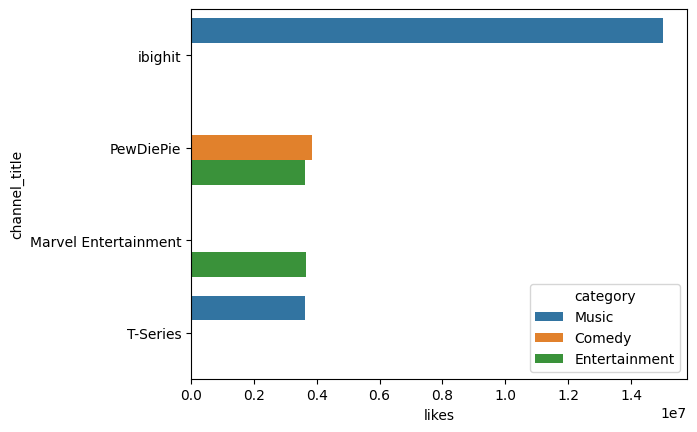

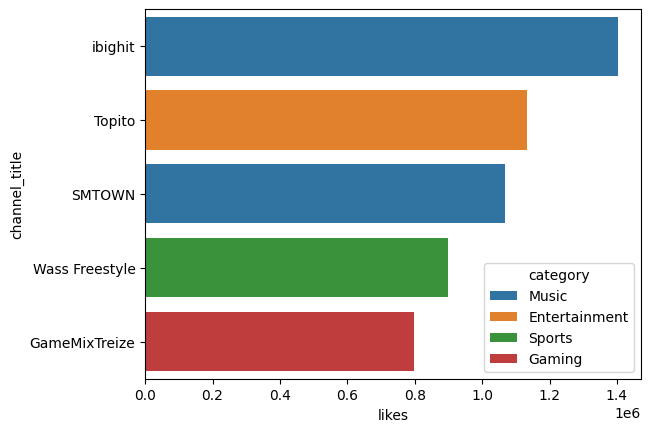

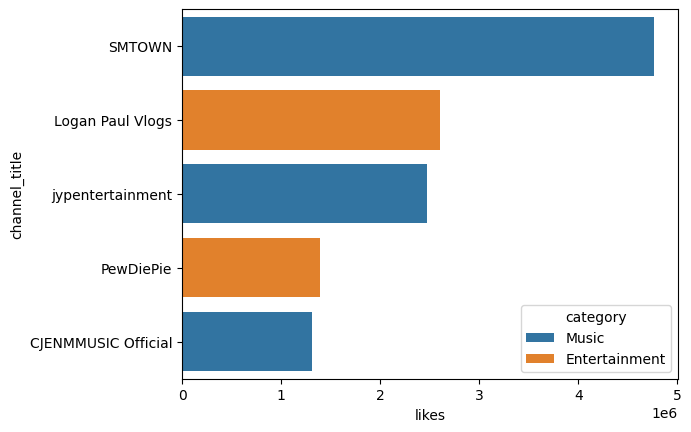

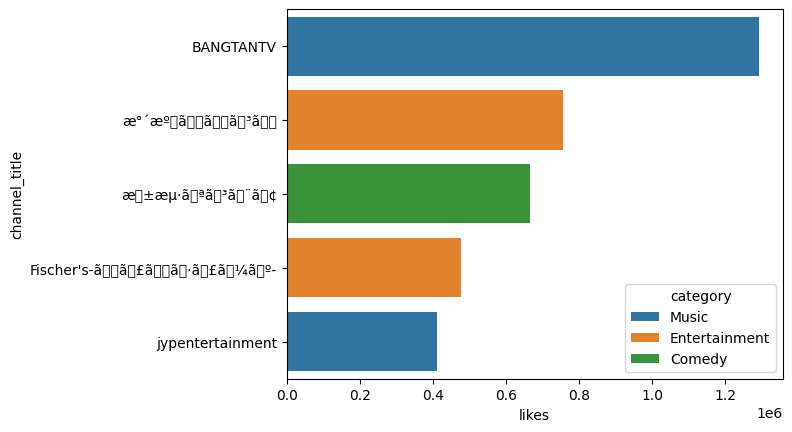

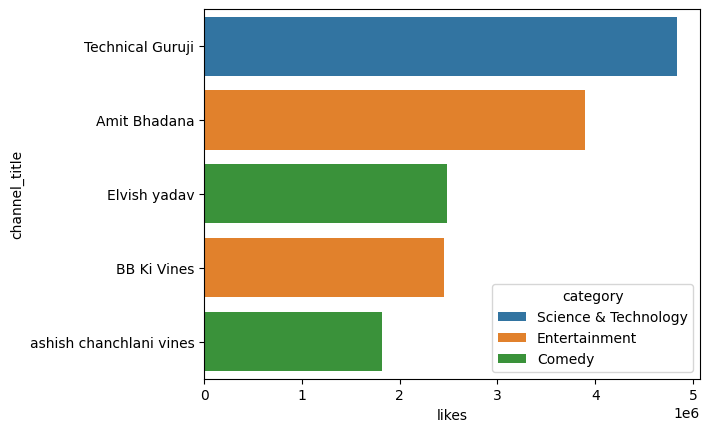

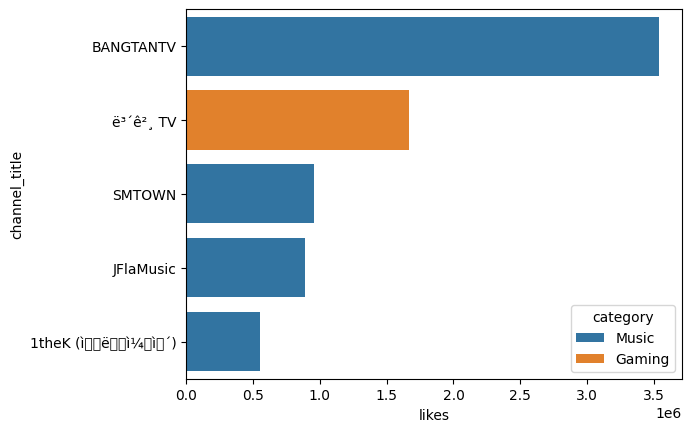

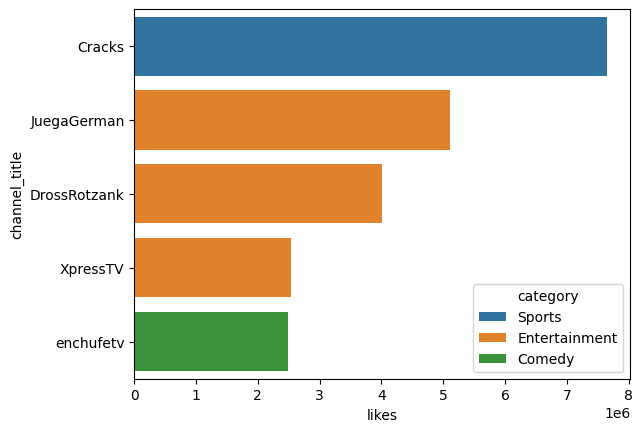

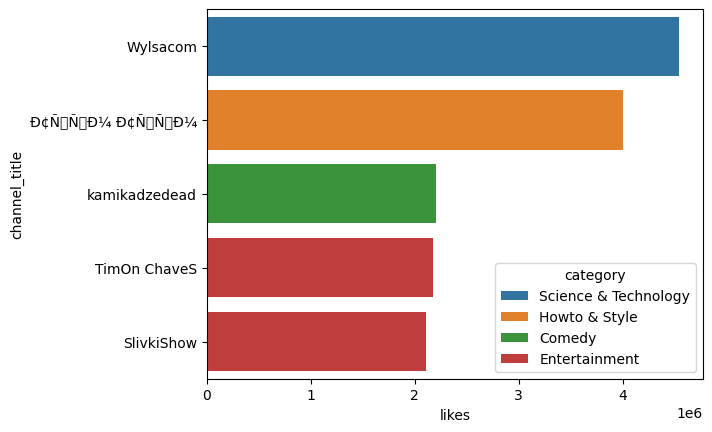

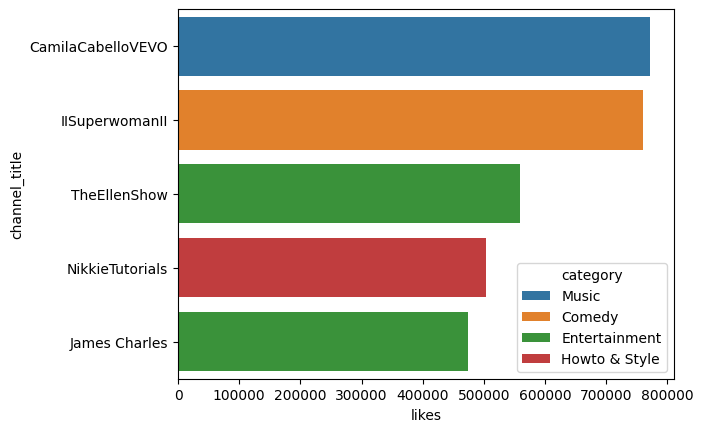

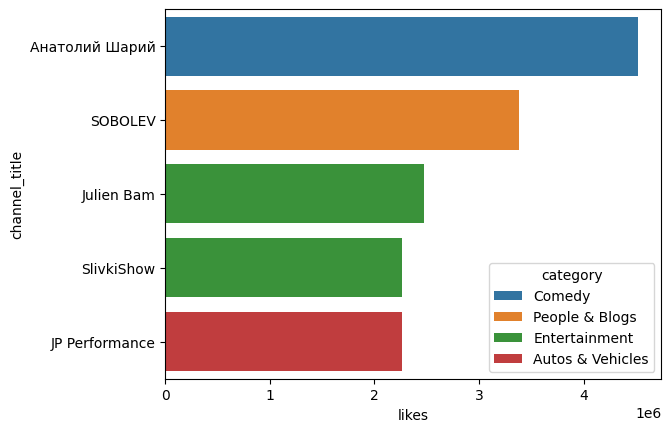

In [244]:
for country in country_map:
    channel_likes=merged_df[merged_df['country']==country_map[country]].groupby(['channel_title','category',])['likes'].sum().sort_values(ascending=False)
    channel_likes=pd.DataFrame(channel_likes)
    channel_likes=channel_likes.head(5)
    #print(channel_likes)
    sns.barplot(x='likes',y='channel_title',data=channel_likes,hue='category')
    plt.show()

In [245]:
#which category videos are the most disliked videos

In [246]:
dislikes=merged_df.groupby('category')['dislikes'].sum().sort_values(ascending=False)
dislikes=pd.DataFrame(dislikes)
dislikes=dislikes.head()

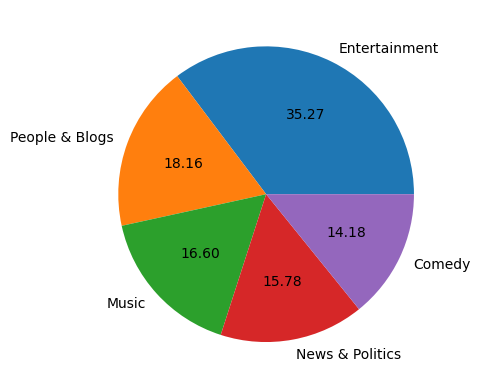

In [247]:
plt.pie(dislikes['dislikes'],labels=dislikes.index,autopct="%.2f")
plt.show()


In [248]:
merged_df.to_csv('youtube_data.csv')

In [249]:
merged_df=merged_df.drop(columns=['id'])

In [250]:
merged_df.to_csv('youtube_data.csv')

In [251]:
merged_df.columns

Index(['channelId', 'category', 'assignable', 'video_id', 'title_y',
       'channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'country', 'trending_date', 'published_date',
       'published_time', 'timespan'],
      dtype='object')

In [253]:
cols=[ 'category',  'video_id', 
        'views', 'likes', 'dislikes', 'comment_count',
        'country', 'trending_date', 'published_date',
       'published_time', 'timespan']

In [254]:
merged_df[cols].to_csv('youtube_data.csv')